<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.973731,64.916878,89.006892,69.351120,321.448828,595.697449,300.534826,295.162623
1,0.0,1.0,60.618553,29.457934,45.195702,78.303335,-11.833331,211.742194,171.148591,40.593604
2,0.0,2.0,53.246680,98.381526,43.843237,57.899372,391.241926,654.612742,251.522479,403.090263
3,0.0,3.0,65.119837,61.395674,30.746192,94.790555,19.903967,281.956225,201.751581,80.204644
4,0.0,4.0,47.988061,25.088852,79.815382,68.254049,-92.567229,138.579115,228.870307,-90.291192
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.527075,50.986989,52.953935,92.502405,231.753392,528.723795,404.819181,123.904614
249996,999.0,246.0,87.465745,88.960916,43.115758,61.336699,-994.158613,-703.279495,459.264908,-1162.544403
249997,999.0,247.0,90.321709,72.323980,88.439387,49.703298,-164.397986,146.390388,448.555754,-302.165367
249998,999.0,248.0,20.452506,28.130176,79.811116,89.782921,-57.268686,170.908033,165.769040,5.138993


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.973731,64.916878,89.006892,69.351120,321.448828,595.697449,300.534826,295.162623
1,0.0,1.0,60.618553,29.457934,45.195702,78.303335,-11.833331,211.742194,171.148591,40.593604
2,0.0,2.0,53.246680,98.381526,43.843237,57.899372,391.241926,654.612742,251.522479,403.090263
3,0.0,3.0,65.119837,61.395674,30.746192,94.790555,19.903967,281.956225,201.751581,80.204644
4,0.0,4.0,47.988061,25.088852,79.815382,68.254049,-92.567229,138.579115,228.870307,-90.291192
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.527075,50.986989,52.953935,92.502405,231.753392,528.723795,404.819181,123.904614
249996,999.0,246.0,87.465745,88.960916,43.115758,61.336699,-994.158613,-703.279495,459.264908,-1162.544403
249997,999.0,247.0,90.321709,72.323980,88.439387,49.703298,-164.397986,146.390388,448.555754,-302.165367
249998,999.0,248.0,20.452506,28.130176,79.811116,89.782921,-57.268686,170.908033,165.769040,5.138993


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

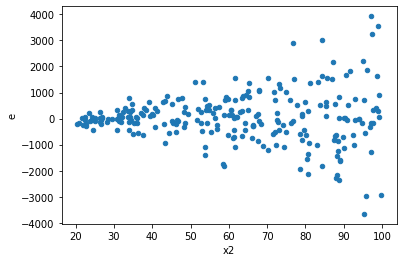

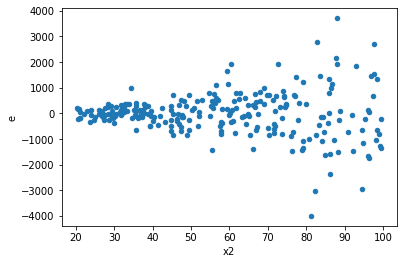

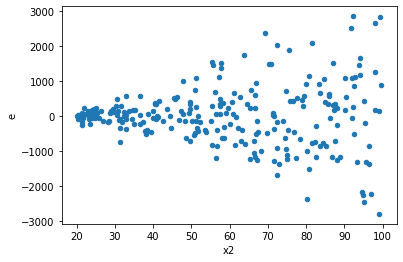

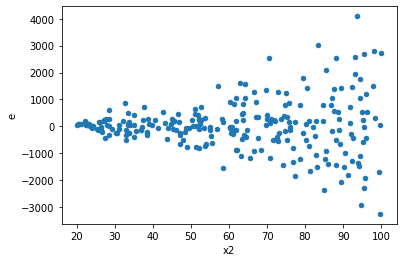

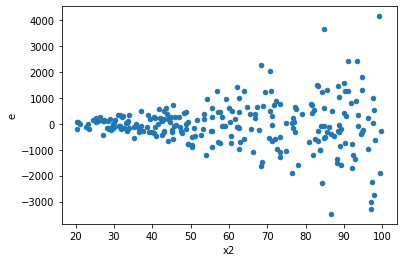

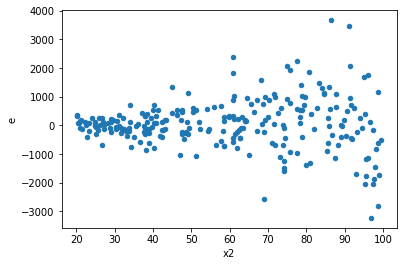

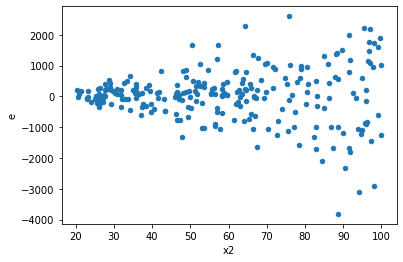

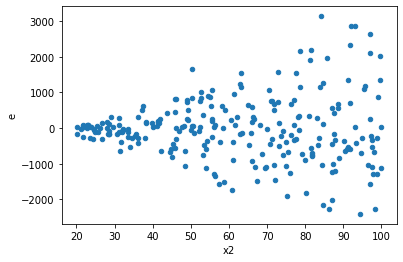

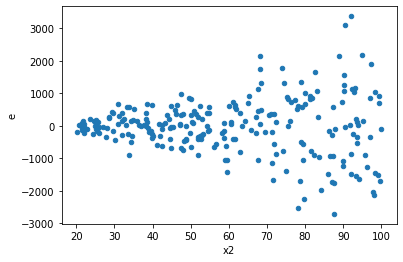

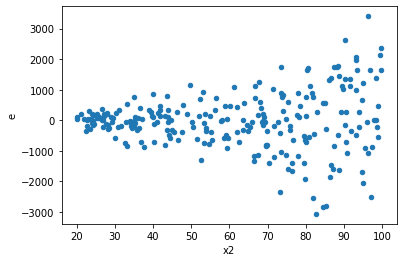

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,110.0,132.0,74553607.04197346,101022500.4844575,677760.0640179405,765321.9733671022,1.1291930787867193,0.5024230584882465,0.7487884707558767,0.25121152924412327,Reject005=1 : Homoscedasticity
3.0,124.0,118.0,92513737.7795797,125307248.59141916,746078.5304804815,1061925.8355205012,1.4233432435545508,0.053896675134714744,0.9730516624326426,0.026948337567357372,Reject005=1 : Homoscedasticity
4.0,119.0,123.0,92833693.37528285,109573273.91690017,780115.0703805282,890839.6253406518,1.1419336187238556,0.4657737823207593,0.7671131088396204,0.23288689116037964,Reject005=1 : Homoscedasticity
9.0,118.0,124.0,50690117.088789046,153885557.49536103,429577.26346431393,1241012.56044646,2.888915838883903,1.0783413939563502e-08,0.999999994608293,5.391706969781751e-09,Reject005=0 : Heteroscedasticity
11.0,136.0,106.0,96321598.67694692,134713512.83197683,708247.0490951979,1270882.1965280834,1.7944052123502172,0.0018219937030388156,0.9990890031484806,0.0009109968515194078,Reject005=0 : Heteroscedasticity
12.0,102.0,140.0,73324496.32617658,125757542.2865003,718867.6110409469,898268.1591892879,1.2495599264634587,0.2212874785147021,0.889356260742649,0.11064373925735105,Reject005=1 : Homoscedasticity
14.0,136.0,106.0,30771153.18350384,141903059.87132087,226258.4792904694,1338708.1119935932,5.916720187423195,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
18.0,115.0,127.0,50103243.41902694,148618914.0927389,435680.377556756,1170227.670021566,2.685977451139903,8.475421031661767e-08,0.9999999576228948,4.2377105158308837e-08,Reject005=0 : Heteroscedasticity
19.0,110.0,132.0,28733061.981751967,134586994.75208965,261209.65437956335,1019598.4450915883,3.903371977247102,2.3447910280083306e-13,0.9999999999998828,1.1723955140041653e-13,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,131.0,111.0,132633053.48151025,94135523.24316359,1012466.0571107653,848067.7769654377,0.8376258848474738,0.3290969622343556,Reject005=1 : Homoscedasticity
1.0,112.0,130.0,90039438.5709617,74698495.24011539,803923.5586693009,574603.8095393492,0.7147493108554568,0.0684900479307647,Reject005=1 : Homoscedasticity
2.0,110.0,132.0,74553607.04197346,101022500.4844575,677760.0640179405,765321.9733671022,1.1291930787867193,0.5024230584882465,Reject005=1 : Homoscedasticity
3.0,124.0,118.0,92513737.7795797,125307248.59141916,746078.5304804815,1061925.8355205012,1.4233432435545508,0.053896675134714744,Reject005=1 : Homoscedasticity
4.0,119.0,123.0,92833693.37528285,109573273.91690017,780115.0703805282,890839.6253406518,1.1419336187238556,0.4657737823207593,Reject005=1 : Homoscedasticity
5.0,95.0,147.0,83627984.65861188,90467814.67507005,880294.5753538093,615427.3107147622,0.6991151916020938,0.060599739726539176,Reject005=1 : Homoscedasticity
6.0,118.0,124.0,107136240.28157203,72564678.91373517,907934.2396743392,585199.0234978643,0.6445389962468706,0.016637468642252583,Reject005=0 : Heteroscedasticity
7.0,132.0,110.0,130618849.13491885,62595999.05620649,989536.7358705974,569054.5368746044,0.575071663584019,0.0023992336942470697,Reject005=0 : Heteroscedasticity
8.0,124.0,118.0,100481119.67163117,73402857.61764863,810331.61025509,622058.115403802,0.7676587060548952,0.14656019259592523,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    706
Reject005=1 : Homoscedasticity      294
Name: Result_test, dtype: int64